## Detection of Ransomware in Bitcoin Heist Transaction

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set_style("darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/BitcoinHeistData.csv')

In [4]:
df.head(10)

,address,year,day,length,weight,count,looped,neighbors,income,label
0,111K8kZAEnJg245r2cM6y9zgJGHZtJPy6,2017,11,18,8.333333e-03,1,0,2,100050000.0,princetonCerber
1,1123pJv8jzeFQaCV4w644pzQJzVWay2zcA,2016,132,44,2.441406e-04,1,0,1,100000000.0,princetonLocky
2,112536im7hy6wtKbpH1qYDWtTyMRAcA2p7,2016,246,0,1.000000e+00,1,0,2,200000000.0,princetonCerber
3,1126eDRw2wqSkWosjTCre8cjjQW8sSeWH7,2016,322,72,3.906250e-03,1,0,2,71200000.0,princetonCerber
4,1129TSjKtx65E35GiUo4AYVeyo48twbrGX,2016,238,144,7.284841e-02,456,0,1,200000000.0,princetonLocky
5,112AmFATxzhuSpvtz1hfpa3Zrw3BG276pc,2016,96,144,8.461400e-02,2821,0,1,50000000.0,princetonLocky
6,112E91jxS2qrQY1z78LPWUWrLVFGqbYPQ1,2016,225,142,2.088519e-03,881,0,2,100000000.0,princetonCerber
7,112eFykaD53KEkKeYW9KW8eWebZYSbt2f5,2016,324,78,3.906250e-03,1,0,2,100990000.0,princetonCerber
8,112FTiRdJjMrNgEtd4fvdoq3TC33Ah5Dep,2016,298,144,2.302828e+00,4220,0,2,80000000.0,princetonCerber
9,112GocBgFSnaote6krx828qaockFraD8mp,2016,62,112,3.725290e-09,1,0,1,50000000.0,princetonLocky


In [5]:
# get descriptive statistics
df.describe()

,year,day,length,weight,count,looped,neighbors,income
count,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06,2.916697e+06
mean,2.014475e+03,1.814572e+02,4.500859e+01,5.455192e-01,7.216446e+02,2.385067e+02,2.206516e+00,4.464889e+09
std,2.257398e+00,1.040118e+02,5.898236e+01,3.674255e+00,1.689676e+03,9.663217e+02,1.791877e+01,1.626860e+11
min,2.011000e+03,1.000000e+00,0.000000e+00,3.606469e-94,1.000000e+00,0.000000e+00,1.000000e+00,3.000000e+07
25%,2.013000e+03,9.200000e+01,2.000000e+00,2.148438e-02,1.000000e+00,0.000000e+00,1.000000e+00,7.428559e+07
50%,2.014000e+03,1.810000e+02,8.000000e+00,2.500000e-01,1.000000e+00,0.000000e+00,2.000000e+00,1.999985e+08
75%,2.016000e+03,2.710000e+02,1.080000e+02,8.819482e-01,5.600000e+01,0.000000e+00,2.000000e+00,9.940000e+08
max,2.018000e+03,3.650000e+02,1.440000e+02,1.943749e+03,1.449700e+04,1.449600e+04,1.292000e+04,4.996440e+13


In [6]:
# get the shape of the dataframe
print(df.shape)

(2916697, 10)


In [ ]:
# check for missing values
print(df.isnull().sum())

In [9]:
# drop date, year and address columns
df = df.drop(['year'], axis=1)
df = df.drop(['day'], axis=1)
df = df.drop(['address'], axis=1)

# Exploratory Data Analysis

In [10]:
# 1. Correlation matrix
corr = df.corr()
print(corr)

             length    weight     count    looped  neighbors    income
length     1.000000  0.000228  0.703467  0.411609   0.031523  0.000488
weight     0.000228  1.000000  0.022313  0.061646   0.691963  0.069774
count      0.703467  0.022313  1.000000  0.560370   0.025441 -0.003635
looped     0.411609  0.061646  0.560370  1.000000   0.052826  0.002551
neighbors  0.031523  0.691963  0.025441  0.052826   1.000000  0.138966
income     0.000488  0.069774 -0.003635  0.002551   0.138966  1.000000


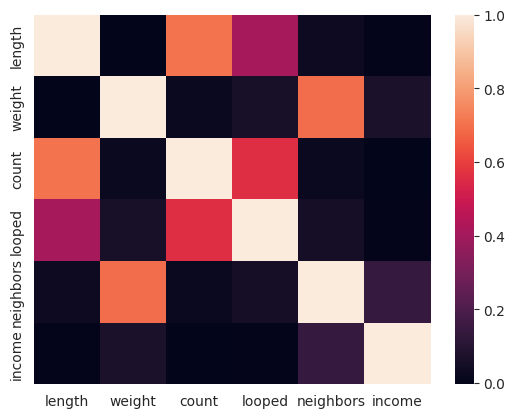

In [11]:
# 2. Heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

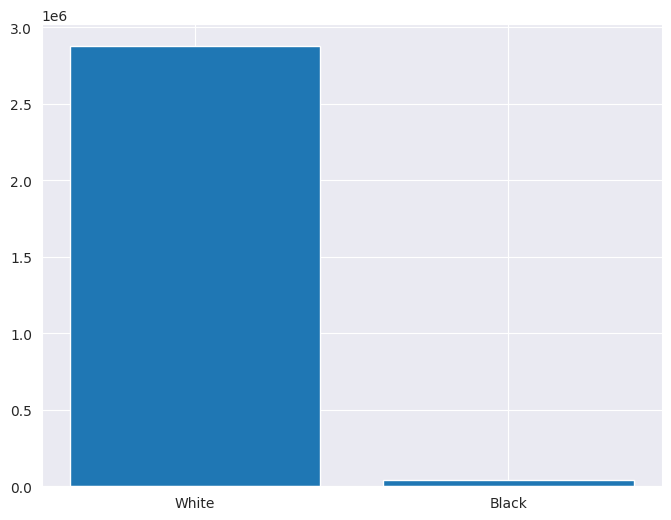

In [12]:
# show the barchart of white label vs rest of the labels treated as black
label_white = []
label_black = []
for element in df.label:
    if element == 'white':
        label_white.append(element)
    else:
        label_black.append(element)

x_ax = ['White','Black']
y_ax = [len(label_white),len(label_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)
plt.savefig("imbalaced")

In [13]:
# make right skewed data to normal distribution
df['income'] = np.log(df['income'])
df['weight'] = np.log(df['weight'])
df['count'] = np.log(df['count'])
df['looped'] = np.log(df['looped'])
df['neighbors'] = np.log(df['neighbors'])
df['length'] = np.log(df['length'])

In [14]:
# drop nan values
df = df.dropna()

In [15]:
df.shape

(2916697, 7)

In [16]:
# drop inf rows
df = df[np.isfinite(df['income'])]
df = df[np.isfinite(df['weight'])]
df = df[np.isfinite(df['count'])]
df = df[np.isfinite(df['looped'])]
df = df[np.isfinite(df['neighbors'])]
df = df[np.isfinite(df['length'])]

In [17]:
# convert label to categorical
df['label'] = df['label'].astype('category')
# make a copy of the dataframe
df_copy = df.copy()
# perform get_dummies on label
label_encode = pd.get_dummies(df_copy.label)
label_encode

,montrealAPT,montrealCryptXXX,montrealCryptoLocker,montrealCryptoTorLocker2015,montrealDMALocker,montrealDMALockerv3,montrealEDA2,montrealGlobe,montrealGlobeImposter,montrealGlobev3,...,montrealRazy,montrealSam,montrealSamSam,montrealWannaCry,montrealXTPLocker,paduaCryptoWall,paduaKeRanger,princetonCerber,princetonLocky,white
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2916668,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2916680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2916688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# make a new column called 'label_encoded' in df
df['label_encoded'] = label_encode.white
# drop label column
df = df.drop(['label'], axis=1)
# reset index
df = df.reset_index(drop=True)
# get top 5 rows of the dataframe
print(df.head())

     length    weight     count    looped  neighbors     income  label_encoded
0  2.079442 -4.969813  0.000000  0.000000   0.693147  18.197537              0
1  4.969813  0.474460  8.631414  8.096513   0.693147  18.941377              0
2  2.484907 -9.939627  0.000000  0.000000   0.693147  18.197537              0
3  4.969813  1.299378  7.719130  0.693147   1.791759  19.304364              0
4  4.969813 -0.631770  7.579679  7.080868   0.000000  18.323068              0


In [19]:
df.shape

(411820, 7)

In [20]:
#corelation matrix
corr = df.corr()
# print(corr)

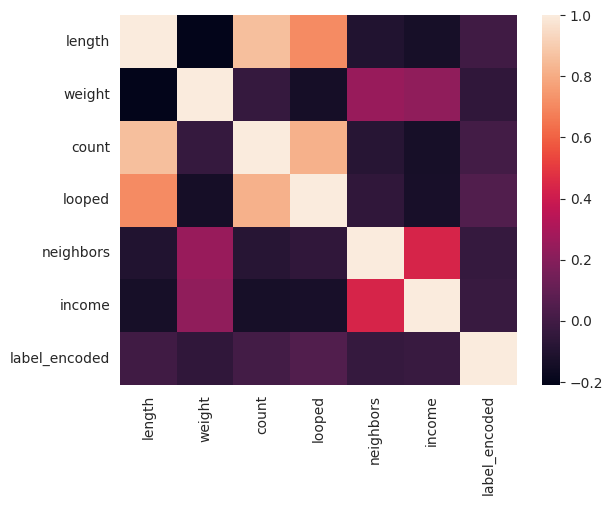

In [21]:
# heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

In [22]:
from sklearn.ensemble import IsolationForest

In [23]:
check_cols=['length','weight','count','looped','neighbors','income']
train_set=df[check_cols]
train_set.head()

,length,weight,count,looped,neighbors,income
0,2.079442,-4.969813,0.000000,0.000000,0.693147,18.197537
1,4.969813,0.474460,8.631414,8.096513,0.693147,18.941377
2,2.484907,-9.939627,0.000000,0.000000,0.693147,18.197537
3,4.969813,1.299378,7.719130,0.693147,1.791759,19.304364
4,4.969813,-0.631770,7.579679,7.080868,0.000000,18.323068


In [24]:
clf=IsolationForest(n_jobs=6,random_state=23,contamination=0.01)
clf.fit(train_set)
y_pred_train=clf.predict(train_set)

In [25]:
pd.value_counts(y_pred_train)

 1    407701
-1      4119
dtype: int64

In [26]:
X_cleaned=train_set[y_pred_train==1]

In [27]:
y_cleaned=df['label_encoded'][y_pred_train==1]

In [28]:
X_cleaned

,length,weight,count,looped,neighbors,income
0,2.079442,-4.969813,0.000000,0.000000,0.693147,18.197537
1,4.969813,0.474460,8.631414,8.096513,0.693147,18.941377
2,2.484907,-9.939627,0.000000,0.000000,0.693147,18.197537
3,4.969813,1.299378,7.719130,0.693147,1.791759,19.304364
4,4.969813,-0.631770,7.579679,7.080868,0.000000,18.323068
...,...,...,...,...,...,...
411814,0.693147,0.347667,0.693147,0.693147,1.791759,20.240032
411815,4.969813,-0.281698,9.017605,9.017605,1.609438,21.682758
411816,4.969813,-1.834454,8.645586,1.386294,1.386294,19.988793
411817,4.969813,-0.332051,9.017605,9.017605,1.098612,21.073504


In [29]:
y_cleaned.value_counts()

1    403239
0      4462
Name: label_encoded, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

In [32]:
print(X_cleaned.shape,X_resampled.shape)

(407701, 6) (806478, 6)


In [33]:
print(y_resampled.value_counts(normalize=True)*100)

0    50.0
1    50.0
Name: label_encoded, dtype: float64


<BarContainer object of 2 artists>

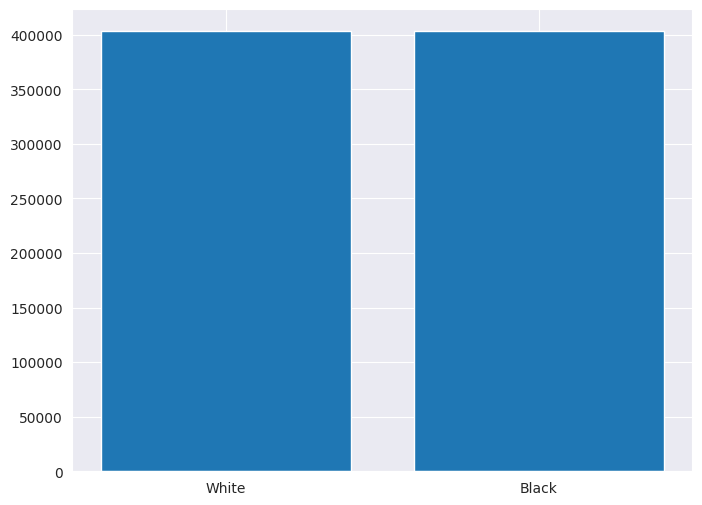

In [34]:
# check if the dataframe is balanced
bw_white = []
bw_black = []
for element in y_resampled:
    if element == 1:
        bw_white.append(element)
    else:
        bw_black.append(element)

x_ax = ['White','Black']
y_ax = [len(bw_white),len(bw_black)]

plt.figure(figsize = (8,6))
plt.bar(x_ax,y_ax)
# plt.savefig("balanced.png")

## Train Test Split

Outlier Detection Method: Isolation forest

Algorithm : Gradient Boosting

Imbalanced Data Handling: Manual addition

Train test split: 70:30

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape)

(564534, 6) (241944, 6)


In [36]:
from sklearn.preprocessing import RobustScaler
# scale the data
scaler = RobustScaler()
# fit the scaler
scaler.fit(X_train)
# transform the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
# create a gradient boosting model with 100 trees
gb = GradientBoostingClassifier(n_estimators=100)
# fit the model
gb.fit(X_train, y_train)
# predict the labels
y_pred = gb.predict(X_test)
# get the accuracy score
print(gb.score(X_test, y_test))

0.8476878947194392


In [38]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[107419  13599]
 [ 23252  97674]]


In [39]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85    121018
           1       0.88      0.81      0.84    120926

    accuracy                           0.85    241944
   macro avg       0.85      0.85      0.85    241944
weighted avg       0.85      0.85      0.85    241944



In [42]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
print('Recall Score',(recall_score(y_test, y_pred)))
print('Precision Score: ',(precision_score(y_test, y_pred)))
print('F1 Score: ',(f1_score(y_test, y_pred)))
print('Accuracy Score: ',(accuracy_score(y_test, y_pred)))
print('ROC Score',roc_auc_score(y_test, y_pred))

Recall Score 0.807717116252915
Precision Score:  0.8777870642473915
F1 Score:  0.84129561281487
Accuracy Score:  0.8476878947194392
ROC Score 0.8476727014770336


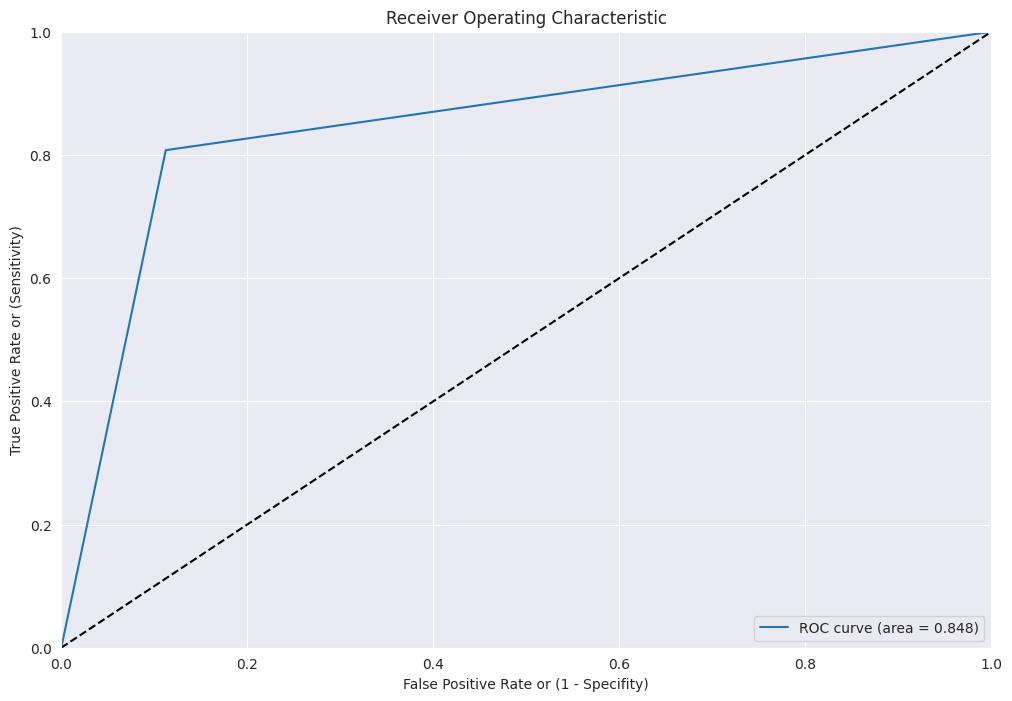

In [43]:
# get the roc curve
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc_1 = roc_auc_score(y_test, y_pred)
plt.plot(fpr_1, tpr_1, label='ROC curve (area = %0.3f)' % roc_1)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Outlier Detection Method: Isolation forest

Algorithm : Gradient Boosting

Imbalanced Data Handling: Manual addition

Train test split: 75:25

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [45]:
from sklearn.preprocessing import RobustScaler
# scale the data
scaler = RobustScaler()
# fit the scaler
scaler.fit(X_train1)
# transform the data
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [46]:
# gradient boosting model
gb1 = GradientBoostingClassifier(n_estimators=100)
gb1.fit(X_train1, y_train1)

GradientBoostingClassifier()

In [47]:
y_pred1 = gb1.predict(X_test1)
print(gb1.score(X_test1, y_test1))

0.8506348576530106


In [48]:
# get the classification report
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86    100904
           1       0.88      0.82      0.84    100716

    accuracy                           0.85    201620
   macro avg       0.85      0.85      0.85    201620
weighted avg       0.85      0.85      0.85    201620



In [51]:
print('Recall Score:',(recall_score(y_test1, y_pred1)))
print('Precision Score: ',(precision_score(y_test1, y_pred1)))
print('F1 Score: ',(f1_score(y_test1, y_pred1)))
print('Accuracy Score: ',(accuracy_score(y_test1, y_pred1)))
print('ROC Score',roc_auc_score(y_test1, y_pred1))

Recall Score: 0.8150144962071567
Precision Score:  0.8772670435721233
F1 Score:  0.8449957536608591
Accuracy Score:  0.8706348576530106
ROC Score 0.8506016744890537


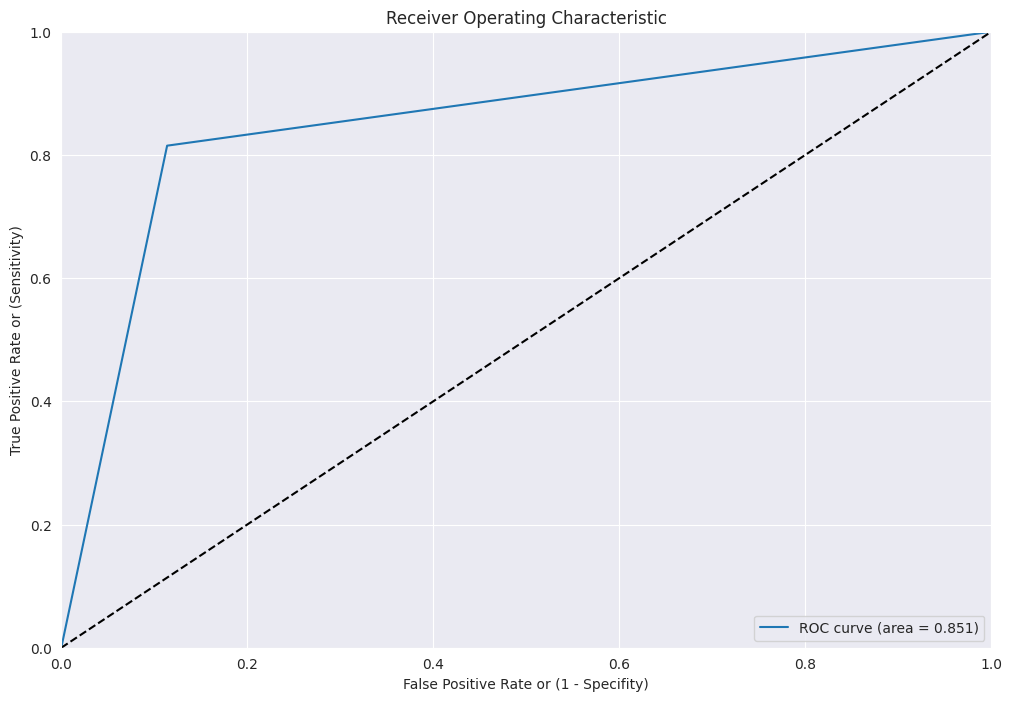

In [52]:
# get the roc curve
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test1, y_pred1)
# Plot ROC curve
plt.figure(figsize = (12,8))
roc_2 = roc_auc_score(y_test1, y_pred1)
plt.plot(fpr_2, tpr_2, label='ROC curve (area = %0.3f)' % roc_2)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Outlier Detection Method: Isolation forest

Algorithm : Gradient Boosting

Imbalanced Data Handling: SMOTE

Train test split: 75:25

In [60]:
df3=df.copy()

In [54]:
df3

,length,weight,count,looped,neighbors,income,label_encoded
0,2.079442,-4.969813,0.000000,0.000000,0.693147,18.197537,0
1,4.969813,0.474460,8.631414,8.096513,0.693147,18.941377,0
2,2.484907,-9.939627,0.000000,0.000000,0.693147,18.197537,0
3,4.969813,1.299378,7.719130,0.693147,1.791759,19.304364,0
4,4.969813,-0.631770,7.579679,7.080868,0.000000,18.323068,0
...,...,...,...,...,...,...,...
411815,4.969813,-0.281698,9.017605,9.017605,1.609438,21.682758,1
411816,4.969813,-1.834454,8.645586,1.386294,1.386294,19.988793,1
411817,4.969813,-0.332051,9.017605,9.017605,1.098612,21.073504,1
411818,4.969813,-1.525782,9.017605,9.017605,0.693147,19.113578,1


In [55]:
sum=0
for col in check_cols:

  data = np.array(df3[col])
  # calculate the IQR
  q1, q3 = np.percentile(data, [25, 75])
  iqr = q3 - q1

  # identify the outliers
  threshold = 1.5
  lower_bound = q1 - (threshold * iqr)
  upper_bound = q3 + (threshold * iqr)
  outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
  #print(len(outliers))
  total_data_points=data.shape[0]
  contamination_length = len(outliers) / total_data_points
  print(contamination_length)
  sum+=contamination_length

0.15183818172988198
0.046928269632363656
0.0
0.0
0.20381477344470886
0.014040114613180516


In [58]:
avg=sum/len(check_cols)
print(avg)

0.06943688990335582


In [61]:
# remove or replace the outliers
df3 = df3.reset_index(drop=True) # reset index
df3 = df3.drop(outliers, axis=0)

In [62]:
df3.shape

(406038, 7)

In [63]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(df3[check_cols], df3['label_encoded'])

In [65]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
print(X_train3.shape,X_test3.shape)

(602419, 6) (200807, 6)


In [66]:
scaler = RobustScaler()
# fit the scaler
scaler.fit(X_train3)
# transform the data
X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [67]:
# create a gradient boosting model with 100 trees
gb = GradientBoostingClassifier(n_estimators=100)
# fit the model
gb.fit(X_train3, y_train3)
# predict the labels
y_pred3 = gb.predict(X_test3)
# get the accuracy score
print(gb.score(X_test3, y_test3))

0.8469724660992893


In [68]:
# get the confusion matrix
cm = confusion_matrix(y_test3, y_pred3)
print(cm)

[[88854 11553]
 [19176 81224]]


In [69]:
# get the classification report
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85    100407
           1       0.88      0.81      0.84    100400

    accuracy                           0.85    200807
   macro avg       0.85      0.85      0.85    200807
weighted avg       0.85      0.85      0.85    200807



In [70]:
print('Recall Score: ',(recall_score(y_test3, y_pred3)))
print('Precision Score: ',(precision_score(y_test3, y_pred3)))
print('F1 Score: ',(f1_score(y_test3, y_pred3)))
print('Accuracy Score: ',(accuracy_score(y_test3, y_pred3)))
print('ROC Score',roc_auc_score(y_test3, y_pred3))

Recall Score:  0.8090039840637451
Precision Score:  0.8754756027894844
F1 Score:  0.8409282678579747
Accuracy Score:  0.8789724660992894
ROC Score 0.8469711425891047


Outlier Detection Method: Isolation forest with IQR fine tuning

Algorithm : Gradient Boosting

Imbalanced Data Handling: SMOTE

Train test split: 75:25

In [71]:
clf2=IsolationForest(n_jobs=6,random_state=23,contamination=avg)
clf2.fit(train_set)
outlier=clf2.predict(train_set)

In [72]:
pd.value_counts(outlier)

 1    383224
-1     28596
dtype: int64

In [73]:
X_cleaned2=train_set[outlier==1]
y_cleaned2=df['label_encoded'][outlier==1]

In [74]:
smote = SMOTE(random_state=42)
X_resampled_new, y_resampled_new = smote.fit_resample(X_cleaned2, y_cleaned2)

In [76]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X_resampled_new, y_resampled_new, test_size=0.25, random_state=42)
print(X_train4.shape,X_test4.shape)

(568590, 6) (189530, 6)


In [77]:
scaler = RobustScaler()
scaler.fit(X_train4)
X_train4 = scaler.transform(X_train4)
X_test4 = scaler.transform(X_test4)

In [ ]:
gb4 = GradientBoostingClassifier(n_estimators=100)
gb4.fit(X_train4, y_train4)
y_pred4 = gb4.predict(X_test4)
# get the accuracy score
print(gb4.score(X_test4, y_test4))

In [ ]:
# get the confusion matrix
cm = confusion_matrix(y_test4, y_pred4)
print(cm)

In [ ]:
# get the classification report
print(classification_report(y_test4, y_pred4))

In [151]:
print('Recall Score:',(recall_score(y_test4, y_pred4)))
print('Precision Score:',(precision_score(y_test4, y_pred4)))
print('F1 Score:',(f1_score(y_test4, y_pred4)))
print('Accuracy Score:',(accuracy_score(y_test4, y_pred4)))
print('ROC score',roc_auc_score(y_test, y_pred))

Recall Score: 0.8170739414366969
Precision Score: 0.8805307725487526
F1 Score: 0.8476163419617784
Accuracy Score: 0.8532061807923876


In [153]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(train_set)

DBSCAN()

In [154]:
X_cleaned=train_set[dbscan.labels_!=-1]
y_cleaned=df['label_encoded'][dbscan.labels_!=-1]

In [156]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_cleaned, y_cleaned)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

In [158]:
scaler = RobustScaler()
# fit the scaler
scaler.fit(X_train)
# transform the data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
# gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
# create a gradient boosting model with 100 trees
gb = GradientBoostingClassifier(n_estimators=100)
# fit the model
gb.fit(X_train, y_train)
# predict the labels
y_pred = gb.predict(X_test)
# get the accuracy score
print(gb.score(X_test, y_test))

0.8499307381027694


In [160]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[81401 10267]
 [17250 74444]]


In [161]:
# get the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     91668
           1       0.88      0.81      0.84     91694

    accuracy                           0.85    183362
   macro avg       0.85      0.85      0.85    183362
weighted avg       0.85      0.85      0.85    183362

